In [104]:
import requests
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [87]:
forecast = requests.get("http://api.weatherapi.com/v1/forecast.json?key=4a1f9e155ac6494e98a15506222712&q=SE93HX&days=1&aqi=no&alerts=no")

In [88]:
print (f"Response code: {forecast.status_code}")

Response code: 200


In [89]:
df = pd.read_json(forecast.text)
df.head()

,location,current,forecast
name,Eltham,NaN,NaN
region,London,NaN,NaN
country,UK,NaN,NaN
lat,51.45,NaN,NaN
lon,0.06,NaN,NaN


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, name to forecastday
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  8 non-null      object
 1   current   23 non-null     object
 2   forecast  1 non-null      object
dtypes: object(3)
memory usage: 1.0+ KB


In [91]:
df.isna().sum()

location    24
current      9
forecast    31
dtype: int64

In [92]:
df.describe()

,location,current,forecast
count,8,23.0,1
unique,8,21.0,1
top,Eltham,0.0,"[{'date': '2023-02-07', 'date_epoch': 16757280..."
freq,1,3.0,1


In [93]:
df = df.fillna(0)

In [94]:
df_forecast = df["forecast"]


In [116]:
x = df.loc["forecastday"]["forecast"]

def convert(a):
    it = iter(a)
    res_dct = dict(zip(it, it))
    return res_dct

#print (convert(x))





AttributeError: 'list' object has no attribute 'keys'

In [119]:
column = []
df_forecast = df.forecast.loc["forecastday"]
df_forecast = np.array(df_forecast)

df_forecast = pd.DataFrame(df_forecast)

df_forecast

,0
0,"{'date': '2023-02-07', 'date_epoch': 167572800..."


In [122]:
print (df_forecast)

for i in df_forecast:
    print (df_forecast[i])

                                                   0
0  {'date': '2023-02-07', 'date_epoch': 167572800...
0    {'date': '2023-02-07', 'date_epoch': 167572800...
Name: 0, dtype: object


In [98]:
df_forecast

,0
0,"{'date': '2023-02-07', 'date_epoch': 167572800..."


In [99]:
type(df_forecast)

pandas.core.frame.DataFrame

In [103]:
x = [1, 2, 3, 4, 5]

x[::2]

[1, 3, 5]

In [137]:


forecast = df.loc["forecastday"]["forecast"]

forecast = pd.DataFrame(forecast)

In [140]:
forecast.columns

Index(['date', 'date_epoch', 'day', 'astro', 'hour'], dtype='object')

In [143]:
forecast

,date,date_epoch,day,astro,hour
0,2023-02-07,1675728000,"{'maxtemp_c': 6.4, 'maxtemp_f': 43.5, 'mintemp...","{'sunrise': '07:29 AM', 'sunset': '05:00 PM', ...","[{'time_epoch': 1675728000, 'time': '2023-02-0..."


In [145]:
x = df['forecast']["forecastday"]

x = pd.DataFrame(x)
x

,date,date_epoch,day,astro,hour
0,2023-02-07,1675728000,"{'maxtemp_c': 6.4, 'maxtemp_f': 43.5, 'mintemp...","{'sunrise': '07:29 AM', 'sunset': '05:00 PM', ...","[{'time_epoch': 1675728000, 'time': '2023-02-0..."


In [146]:
emission = pd.read_csv("greenhouse.csv")
print (max(emission.value))

7422207.96295139


In [154]:
emission.rename({"country_or_area": "country"}, axis=1, inplace=True)




In [155]:
emission.head()



,country,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...
...,...,...,...,...
8401,United States of America,1994,593.222570,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8402,United States of America,1993,586.939752,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8403,United States of America,1992,574.414624,unspecified_mix_of_hydrofluorocarbons_hfcs_and...
8404,United States of America,1991,566.900968,unspecified_mix_of_hydrofluorocarbons_hfcs_and...


In [156]:
unique = emission.country.unique()

In [157]:
unique

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [158]:
emission.columns

Index(['country', 'year', 'value', 'category'], dtype='object')

In [159]:
Australia = emission[emission.country == "Australia"]

In [160]:
Australia

,country,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...
...,...,...,...,...
7319,Australia,1994,282.640896,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7320,Australia,1993,264.759156,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7321,Australia,1992,246.858849,sulphur_hexafluoride_sf6_emissions_in_kilotonn...
7322,Australia,1991,228.944834,sulphur_hexafluoride_sf6_emissions_in_kilotonn...


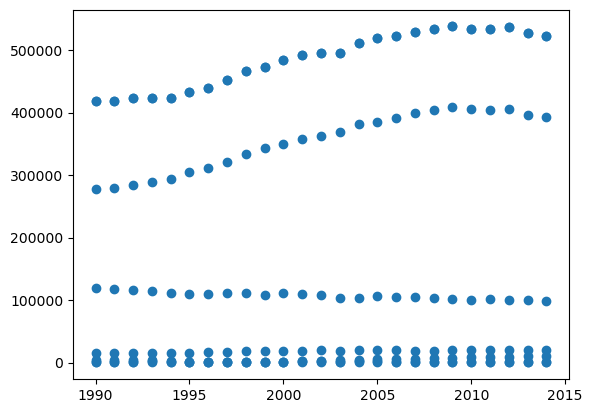

In [161]:
plt.scatter(Australia.year, Australia.value)

In [162]:
unique

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

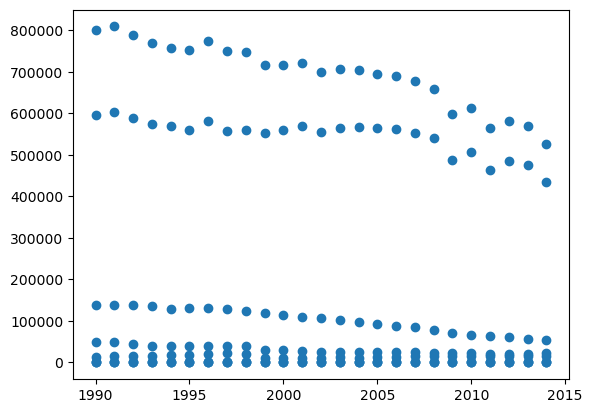

In [163]:
United_Kingdom = emission[emission.country == "United Kingdom"]
plt.scatter(United_Kingdom.year, United_Kingdom.value)

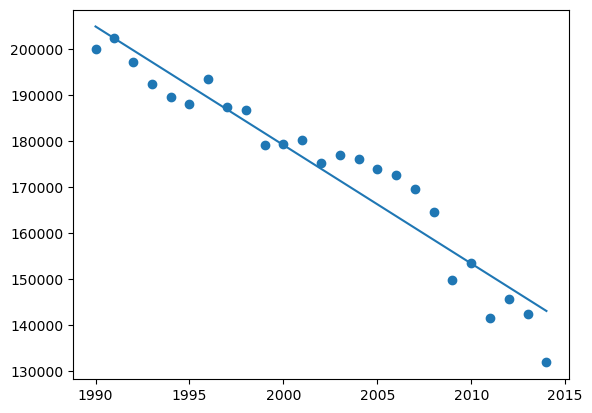

In [179]:
new = pd.DataFrame(United_Kingdom.groupby(["year"])["value"].mean())


new["Year"] = [i for i in new.index]

plt.scatter(new.Year, new.value)
reg = np.polyfit(new.Year, new.value, deg=1)
trend = np.polyval(reg, new.Year)
plt.plot(new.Year, trend)


In [175]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [178]:
lm.fit(new.Year, new.value.values.reshape(-1,1))

ValueError: Expected 2D array, got 1D array instead:
array=[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.